| Package     | Version   |
|-------------|-----------|
| Python      | 3.11.12   |
| numpy       | 2.0.2     |
| pandas      | 2.2.2     |
| matplotlib  | 3.10.0    |
| seaborn     | 0.13.2    |
| scanpy      | 1.11.1    |
| gseapy      | 1.1.3     |


#GSVA

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import gseapy as gp

In [ ]:
GSEAadata = sc.read_h5ad('1_Endo_count.h5ad')
print(GSEAadata.X)

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 3996559 stored elements and shape (1378, 27705)>
  Coords	Values
  (232, 0)	1.0
  (437, 0)	1.0
  (470, 0)	1.0
  (926, 0)	1.0
  (235, 1)	1.0
  (466, 1)	1.0
  (524, 1)	2.0
  (526, 1)	1.0
  (556, 1)	1.0
  (1054, 1)	1.0
  (22, 4)	1.0
  (27, 4)	1.0
  (72, 4)	1.0
  (101, 4)	1.0
  (136, 4)	1.0
  (159, 4)	1.0
  (313, 4)	1.0
  (349, 4)	1.0
  (467, 4)	1.0
  (476, 4)	1.0
  (482, 4)	1.0
  (502, 4)	1.0
  (540, 4)	1.0
  (602, 4)	1.0
  (673, 4)	1.0
  :	:
  (873, 27538)	1.0
  (1121, 27542)	1.0
  (736, 27554)	1.0
  (921, 27563)	1.0
  (829, 27566)	1.0
  (943, 27577)	1.0
  (1002, 27580)	1.0
  (1069, 27600)	1.0
  (1067, 27601)	1.0
  (1346, 27603)	1.0
  (1345, 27605)	1.0
  (1067, 27607)	1.0
  (1294, 27608)	1.0
  (913, 27619)	1.0
  (949, 27627)	1.0
  (992, 27627)	1.0
  (1032, 27634)	1.0
  (872, 27637)	1.0
  (851, 27655)	1.0
  (1149, 27655)	1.0
  (1049, 27656)	1.0
  (1143, 27682)	1.0
  (1269, 27682)	1.0
  (1345, 27682)	1.0
  (1302, 27685)	1.0


normalizing counts per cell
    finished (0:00:00)


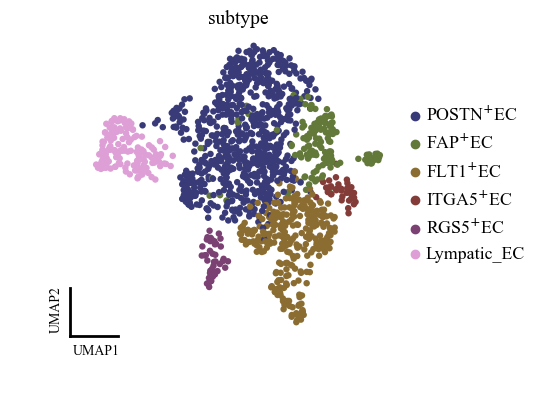

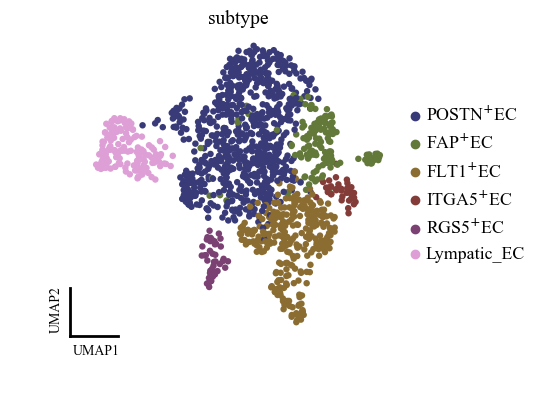

In [ ]:
sc.pp.normalize_total(GSEAadata, target_sum=1e4)
sc.pp.log1p(GSEAadata)
ScPyPy.adv_umap(GSEAadata, color="subtype",min_ax_fontsize = 10,min_ax_lw = 2, save=None)

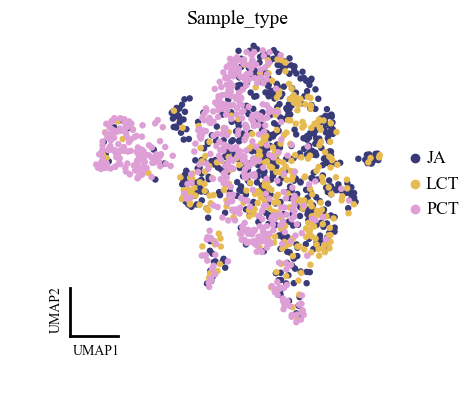

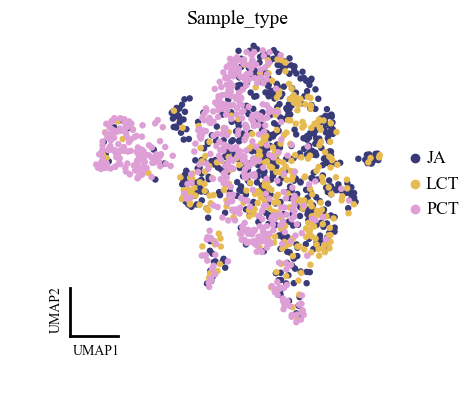

In [ ]:
ScPyPy.adv_umap(GSEAadata, color="Sample_type",min_ax_fontsize = 10,min_ax_lw = 2, save=None)

In [ ]:
sc.tl.rank_genes_groups(GSEAadata, groupby="subtype", method="wilcoxon")
sc.tl.dendrogram(GSEAadata, groupby='subtype')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_subtype']`


In [ ]:
rank_genes = GSEAadata.uns['rank_genes_groups']
gene_names = rank_genes['names']
scores = rank_genes['scores']
logfoldchanges = rank_genes['logfoldchanges']
pvals = rank_genes['pvals']
pvals_adj = rank_genes['pvals_adj']

results = []
for cluster in gene_names.dtype.names:
    cluster_genes = gene_names[cluster]
    cluster_scores = scores[cluster]
    cluster_logfc = logfoldchanges[cluster]
    cluster_pvals = pvals[cluster]
    cluster_pvals_adj = pvals_adj[cluster]

    for i in range(len(cluster_genes)):
        results.append({
            'Cluster': cluster,
            'Gene': cluster_genes[i],
            'Score': cluster_scores[i],
            'LogFoldChange': cluster_logfc[i],
            'PValue': cluster_pvals[i],
            'AdjustedPValue': cluster_pvals_adj[i]
        })

deg_results = pd.DataFrame(results)
print(deg_results.head())

当前工作路径: /content/drive/My Drive/XYA/something
         Cluster      Gene      Score  LogFoldChange         PValue  \
0  POSTN$^{+}$EC     ACKR1  23.720755       4.098091  2.202382e-124   
1  POSTN$^{+}$EC   HLA-DRA  21.140900       2.317971   3.346346e-99   
2  POSTN$^{+}$EC     CCL14  21.130869       3.857653   4.138542e-99   
3  POSTN$^{+}$EC      CD74  20.850695       1.984440   1.502238e-96   
4  POSTN$^{+}$EC  HLA-DPA1  18.366131       1.934004   2.452913e-75   

   AdjustedPValue  
0   6.101699e-120  
1    3.821944e-95  
2    3.821944e-95  
3    1.040488e-92  
4    1.359159e-71  


In [ ]:
p_thresh = 0.01
logfc_thresh = 0.25
selected_group = "ITGA5$^{+}$EC"

names = deg_results[deg_results["Cluster"] == selected_group]["Gene"]
pvals = deg_results[deg_results["Cluster"] == selected_group]["AdjustedPValue"]
logfoldchanges = deg_results[deg_results["Cluster"] == selected_group]["LogFoldChange"]

genes_df = pd.DataFrame({
    "name": names,
    "pvals_adj": pvals,
    "logfoldchanges": logfoldchanges
})

filtered_genes = genes_df[
    (genes_df["pvals_adj"] < p_thresh) &
    (genes_df["logfoldchanges"] > logfc_thresh)
]

sorted_genes = filtered_genes.sort_values(by="logfoldchanges", ascending=False)
ranked_genes = sorted_genes["name"]
ranked_genes_list = ranked_genes.head(100).tolist()

print("Top 30 genes:")
print(ranked_genes.head(30))
print("\nTop 100 genes list:")
print(ranked_genes_list)

output_file = "/content/top_100_genes_fcrank.txt"
with open(output_file, "w") as file:
    for gene in ranked_genes_list:
        file.write(f"{gene}\n")

print(f"Top 100 genes saved to {output_file}")

Top 30 genes:
83116          PGF
83220          KIT
83141         NID2
83150        N4BP3
83121        CHST1
83213         GNG2
83132      TP53I11
83159      TNFRSF4
83240       ADAM19
83265        TTYH2
83179          LOX
83166        CXCR4
83171          H19
83120         IL32
83210       NIBAN1
83123       LGALS1
83211       RASSF2
83118       PCDH12
83221      ADAMTS7
83152         FHL3
83130      ANGPTL2
83157       CHST15
83124     ARHGAP18
83117         MCAM
83161        CD276
83138          LXN
83239      ST3GAL6
83204       HOMER3
83175        PALD1
83129    TNFAIP8L1
Name: name, dtype: object

Top 100 genes list:
['PGF', 'KIT', 'NID2', 'N4BP3', 'CHST1', 'GNG2', 'TP53I11', 'TNFRSF4', 'ADAM19', 'TTYH2', 'LOX', 'CXCR4', 'H19', 'IL32', 'NIBAN1', 'LGALS1', 'RASSF2', 'PCDH12', 'ADAMTS7', 'FHL3', 'ANGPTL2', 'CHST15', 'ARHGAP18', 'MCAM', 'CD276', 'LXN', 'ST3GAL6', 'HOMER3', 'PALD1', 'TNFAIP8L1', 'SLC38A1', 'MYO1B', 'DLL4', 'SLC4A7', 'UBTD1', 'LAMA4', 'PXDN', 'FSCN1', 'SLC39A14', 'MMP

In [ ]:
ranked_genes = ranked_genes[:200]

In [ ]:
enr = gp.enrichr(gene_list=ranked_genes, #
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2023'],
                 organism='human',
                 outdir="/content/gsea_results/enr",
                )

/usr/local/lib/python3.11/dist-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
/usr/local/lib/python3.11/dist-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/usr/local/lib/python3.11/dist-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
/usr/local/lib/python3.11/dist-packages/gseapy/plot.py:694: FutureWarning: A value is tryi

In [ ]:
import re
enr.results["Term"] = enr.results["Term"].str.replace(r"\s*\(GO:\d+\)", "", regex=True)

/usr/local/lib/python3.11/dist-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
/usr/local/lib/python3.11/dist-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




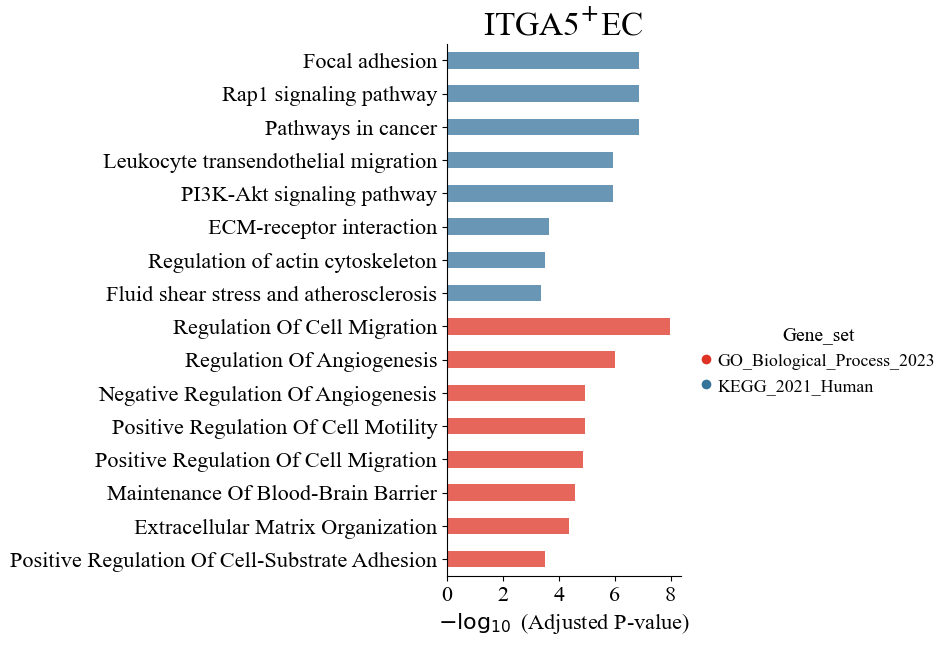

In [ ]:
from gseapy import barplot, dotplot
ax = barplot(
    enr.results,
    column="Adjusted P-value",
    group='Gene_set',
    size=6,
    top_term=8,
    title=selected_group,
    figsize=(3, 7),
    color={
        'GO_Biological_Process_2023': '#de3325',
        'KEGG_2021_Human': '#35739b',
        'MSigDB_Hallmark_2020': '#37b878'
    }
)

ax.grid(False)

plt.savefig(plpath + "Fig2.8.pdf", format="pdf", dpi=600, bbox_inches='tight')
plt.show()

#function

In [ ]:
class ScPyPy:
    @staticmethod
    def adv_umap(adata, color=None, mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False,
        edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None,
        components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map="plasma",
        cmap=None, palette='tab20b', na_color='lightgray', na_in_legend=True, size=None, frameon=False,
        legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None,
        colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False,
        outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, title=None,
        show=False, save=None, ax=None, return_fig=None, marker='.',min_ax_fontsize = 6,min_ax_lw = 2, **kwargs):
        """
        Visualize UMAP projections of the data with the option to save the output.

        Example:
        adv_umap(adata, color_feature, palette='tab20b', save=None, save_format='png')
        Parameters:
        adata (AnnData): Annotated data matrix.
        color_feature (str): Column name in adata.obs to use for coloring.
        palette (str, optional): Color palette name. Defaults to 'tab20b'.
        save (str, optional): If provided, save the figure to this file name within a 'figures' directory.
        save_format (str, optional): Format to save the figure in, e.g., 'png', 'pdf', etc. Defaults to 'png'.
        """
        fig, main_ax = plt.subplots()
        #sc.pl.umap(adata, color=[color_feature], frameon=False, ax=main_ax, show=False,color_map=color_map, palette=palette)
        sc.pl.umap(
        adata=adata,
        ax=main_ax,
        color=color,
        mask_obs=mask_obs,
        gene_symbols=gene_symbols,
        use_raw=use_raw,
        sort_order=sort_order,
        edges=edges,
        edges_width=edges_width,
        edges_color=edges_color,
        neighbors_key=neighbors_key,
        arrows=arrows,
        arrows_kwds=arrows_kwds,
        groups=groups,
        components=components,
        dimensions=dimensions,
        layer=layer,
        projection=projection,
        scale_factor=scale_factor,
        color_map=color_map,
        cmap=cmap,
        palette=palette,
        na_color=na_color,
        na_in_legend=na_in_legend,
        size=size,
        frameon=frameon,
        legend_fontsize=legend_fontsize,
        legend_fontweight=legend_fontweight,
        legend_loc=legend_loc,
        legend_fontoutline=legend_fontoutline,
        colorbar_loc=colorbar_loc,
        vmax=vmax,
        vmin=vmin,
        vcenter=vcenter,
        norm=norm,
        add_outline=add_outline,
        outline_width=outline_width,
        outline_color=outline_color,
        ncols=ncols,
        hspace=hspace,
        wspace=wspace,
        title=title,
        show=show,
        save=save,
        return_fig=return_fig,
        marker=marker,
        **kwargs
              )
        min_ax = fig.add_axes([0.0, 0.0, 0.6, 0.6])  # xmin, ymin, dx, dy
        min_ax.set_xlim(0, 2)
        min_ax.set_ylim(0, 2)
        min_ax.axis('off')
        min_ax.plot([0.5, 0.9], [0.5, 0.5], lw=min_ax_lw, color='k')
        min_ax.plot([0.5, 0.5], [0.5, 0.9], lw=min_ax_lw, color='k')
        min_ax.text(0.72, 0.38, 'UMAP1', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, fontweight='bold')
        min_ax.text(0.38, 0.72, 'UMAP2', horizontalalignment='center', verticalalignment='center', fontsize=min_ax_fontsize, rotation=90, fontweight='bold')

        if save:
            os.makedirs('figures', exist_ok=True)
            file_path = os.path.join('figures', f'{save}.{save_format}')
            plt.savefig(file_path, format=save_format, dpi=300)
            print(f"Saved figure as {file_path}")

        plt.show()
        #plt.close(fig)

        return fig
        plt.close(fig)